In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Penyebab Kematian di Indonesia yang Dilaporkan - Raw.csv to Penyebab Kematian di Indonesia yang Dilaporkan - Raw (2).csv


In [ ]:
df = pd.read_csv("Penyebab Kematian di Indonesia yang Dilaporkan - Raw.csv")
df

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,5,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
1057,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2016,1,0,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
1058,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2017,1,0,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...
1059,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2019,1,0,Profil Kesehatan Indonesia Tahun 2019,Lampiran 63.c,https://pusdatin.kemkes.go.id/download.php?fil...
1060,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2020,1,0,Profil Kesehatan Indonesia Tahun 2020,191,https://pusdatin.kemkes.go.id/download.php?fil...


In [ ]:
df_type = df[df["Type"].apply(lambda x: x == "Bencana Non Alam dan Penyakit")]
df_type = df[df["Total Deaths"].apply(lambda x: x >= 0)]
df_type = df_type[["Cause", "Year", "Total Deaths", "Data Redundancy"]].reset_index()
df_type = df_type[["Cause", "Year", "Total Deaths", "Data Redundancy"]]
df_type

,Cause,Year,Total Deaths,Data Redundancy
0,Abrasi Air Laut,2012,0,1
1,AIDS,2000,47,1
2,AIDS,2001,99,1
3,AIDS,2002,100,1
4,AIDS,2003,261,5
...,...,...,...,...
1057,Wabah Penyakit (Epidemi),2016,0,1
1058,Wabah Penyakit (Epidemi),2017,0,1
1059,Wabah Penyakit (Epidemi),2019,0,1
1060,Wabah Penyakit (Epidemi),2020,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

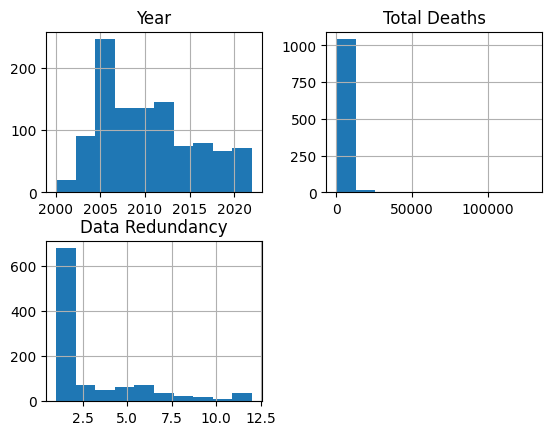

In [ ]:
tabel = df_type[["Cause", "Year", "Total Deaths", "Data Redundancy"]]
tabel.hist()
plt.show

In [ ]:
df_type.describe()

,Year,Total Deaths,Data Redundancy
count,1062.000000,1062.000000,1062.000000
mean,2010.202448,1194.364407,2.932203
std,5.227120,6248.983680,2.776486
min,2000.000000,0.000000,1.000000
25%,2006.000000,6.000000,1.000000
50%,2009.000000,42.000000,1.000000
75%,2014.000000,261.000000,4.000000
max,2022.000000,129171.000000,12.000000


<function matplotlib.pyplot.show(close=None, block=None)>

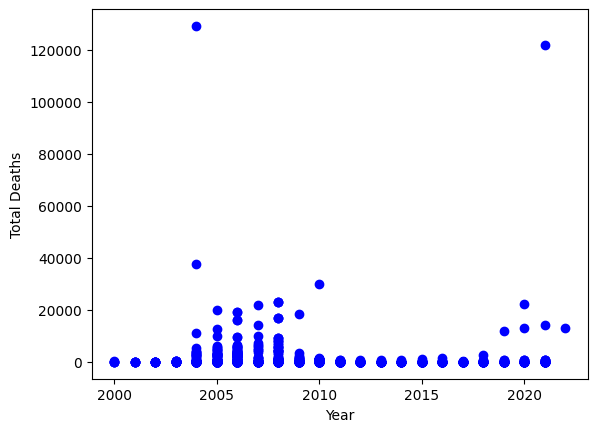

In [ ]:
plt.scatter(df_type.Year, df_type['Total Deaths'], color='Blue')
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.show

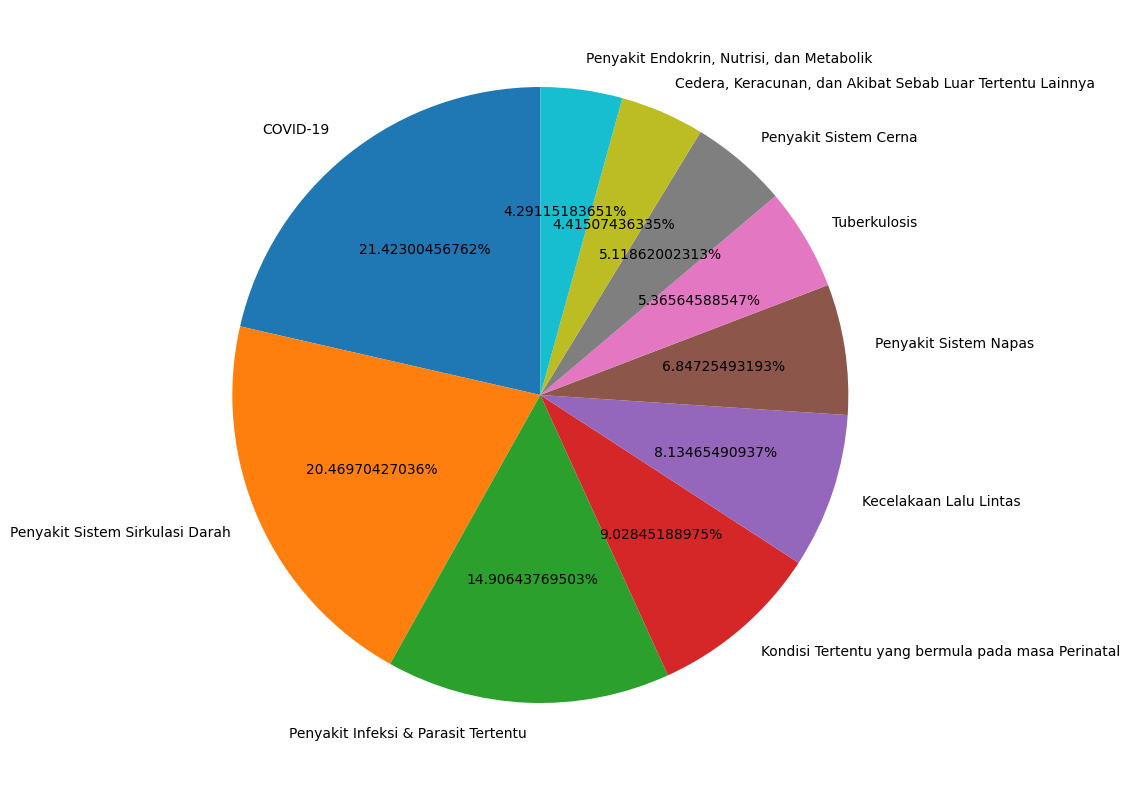

In [ ]:
non_bencana = df.query("Type == 'Bencana Non Alam dan Penyakit'")
non_bencana = non_bencana.groupby('Cause')['Total Deaths'].sum()
non_bencana_teratas = non_bencana.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 10))
plt.pie(non_bencana_teratas.values, labels=non_bencana_teratas.index, autopct='%1.11f%%', startangle=90)
plt.show()


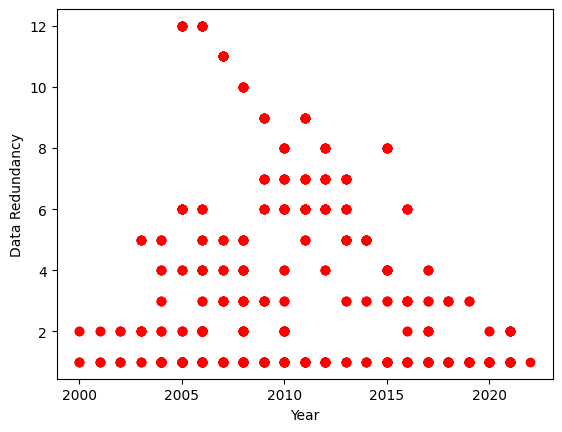

In [ ]:
plt.scatter(df_type['Year'], df_type['Data Redundancy'], color='Red')
plt.xlabel("Year")
plt.ylabel("Data Redundancy")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

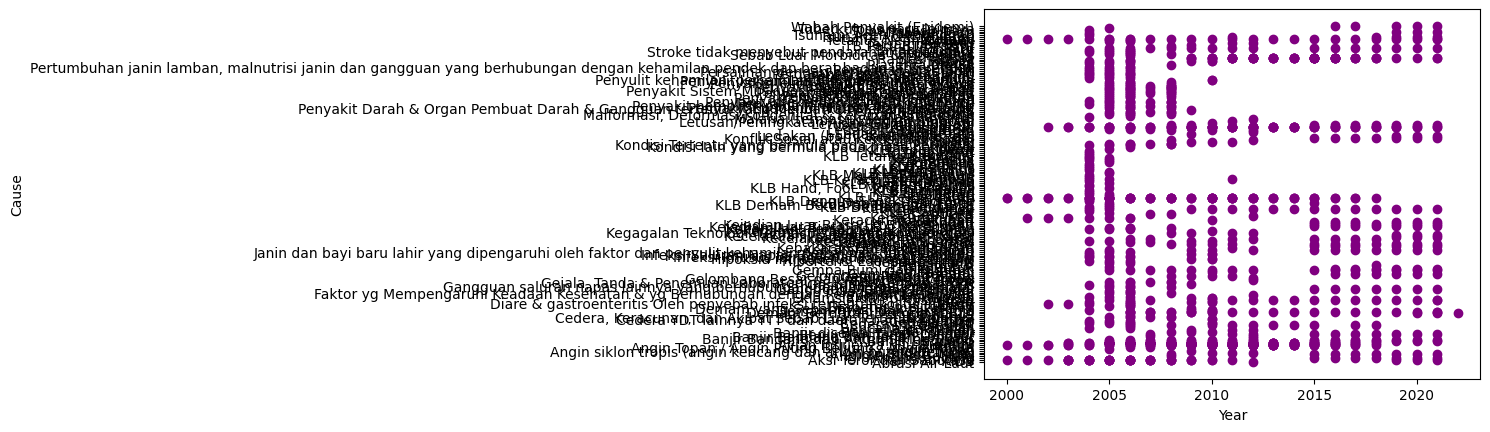

In [ ]:
plt.scatter(df_type.Year, df_type.Cause, color='purple')
plt.xlabel("Year")
plt.ylabel("Cause")
plt.show

In [ ]:
ran = np.random.rand(len(df_type)) < 0.8
train = df_type[ran]
test = df_type[~ran]



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengonversi kolom "Cause" menjadi nilai numerik
train_y_encoded = label_encoder.fit_transform(train["Cause"])

# Mencetak mapping antara nilai string dan nilai numerik
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping Cause to Numerical Values:", mapping)



Mapping Cause to Numerical Values: {'AIDS': 0, 'Abrasi Air Laut': 1, 'Aksi Teror dan Sabotase': 2, 'Angin Puting Beliung': 3, 'Angin Topan': 4, 'Angin Topan / Angin Puting Beliung / Angin Puyuh': 5, 'Angin kencang': 6, 'Angin siklon tropis (angin kencang dan angin puting beliung)': 7, 'Antraks': 8, 'Avian Influenza (Flu Burung)': 9, 'Banjir': 10, 'Banjir Bandang': 11, 'Banjir Bandang dan Angin Siklon Tropis': 12, 'Banjir Bandang dan Tanah Longsor': 13, 'Banjir Lahar Dingin': 14, 'Banjir dan Tanah Longsor': 15, 'Banjir disertai Tanah Longsor': 16, 'Bencana kelaparan': 17, 'COVID-19': 18, 'Campak': 19, 'Cedera YDT lainnya YTT dan daerah badan Multipel': 20, 'Cedera intrakranial': 21, 'Cedera lahir': 22, 'Cedera, Keracunan, dan Akibat Sebab Luar Tertentu Lainnya': 23, 'Demam Berdarah Dengue (DBD)': 24, 'Demam Tifoid dan Paratifoid': 25, 'Diabetes melitus YTT': 26, 'Diare': 27, 'Diare & gastroenteritis Oleh penyebab infeksi tertentu (kolitis infeksi)': 28, 'Difteri': 29, 'Dispepsia': 30, '

In [ ]:
from sklearn import linear_model

# Membuat model regresi linear
regr = linear_model.LinearRegression()

# Melatih model dengan data yang sudah di-label
regr.fit(train_x, train_y_encoded)

# Mencetak koefisien dan intersep dari model setelah pelatihan
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)


Coefficients:  [ 8.75006578e-02  5.34328537e-04 -5.67843549e+00]
Intercept:  -90.60878036938027


In [ ]:
test_x = np.asanyarray(test[["Cause", "Data Redundancy", "Total Deaths"]])
test_y = np.asanyarray(test["Year"])

In [ ]:
ad = df_type.astype(float)  # Konversi string angka ke float

ValueError: ignored